In [196]:
# layer: tiny HTM layer

from numpy import array

    # minicolumn 0 (Mary)

K00 = array([[0,1,2,3,4],[5,6,7,8,9]])
K10 = array([[0,1,2,3,4],[5,6,7,8,9]])
P00 = array([[0,0,0,0,0],[0,0,0,0,0]])
P10 = array([[0,0,0,0,0],[0,0,0,0,0]])
g0 = [0,1]

    # minicolumn 1 (John)

K01 = array([[0,1,2,3,4],[5,6,7,8,9]])
K11 = array([[0,1,2,3,4],[5,6,7,8,9]])
P01 = array([[0,0,0,0,0],[0,0,0,0,0]])
P11 = array([[0,0,0,0,0],[0,0,0,0,0]])
g1 = [2,3]

    # minicolumn 2 (likes)

K02 = array([[0,1,2,3,4],[5,6,7,8,9]])
K12 = array([[0,1,2,3,4],[5,6,7,8,9]])
P02 = array([[0,0,0,0,0],[0,0,0,0,0]])
P12 = array([[0,0,0,0,0],[0,0,0,0,0]])
g2 = [4,5]

    # minicolumn 3 (to)

K03 = array([[0,1,2,3,4],[5,6,7,8,9]])
K13 = array([[0,1,2,3,4],[5,6,7,8,9]])
P03 = array([[0,0,0,0,0],[0,0,0,0,0]])
P13 = array([[0,0,0,0,0],[0,0,0,0,0]])
g3 = [6,7]

    # minicolumn 4 (sing)

K04 = array([[0,1,2,3,4],[5,6,7,8,9]])
K14 = array([[0,1,2,3,4],[5,6,7,8,9]])
P04 = array([[0,0,0,0,0],[0,0,0,0,0]])
P14 = array([[0,0,0,0,0],[0,0,0,0,0]])
g4 = [8,9]

    # minicolumn 5 (dance)

K05 = array([[0,1,2,3,4],[5,6,7,8,9]])
K15 = array([[0,1,2,3,4],[5,6,7,8,9]])
P05 = array([[0,0,0,0,0],[0,0,0,0,0]])
P15 = array([[0,0,0,0,0],[0,0,0,0,0]])
g5 = [10,11]

    # minicolumn 6 (X)

K06 = array([[0,1,2,3,4],[5,6,7,8,9]])
K16 = array([[0,1,2,3,4],[5,6,7,8,9]])
P06 = array([[0,0,0,0,0],[0,0,0,0,0]])
P16 = array([[0,0,0,0,0],[0,0,0,0,0]])
g6 = [12,13]

    # minicolumn 7 (Y)

K07 = array([[0,1,2,3,4],[5,6,7,8,9]])
K17 = array([[0,1,2,3,4],[5,6,7,8,9]])
P07 = array([[0,0,0,0,0],[0,0,0,0,0]])
P17 = array([[0,0,0,0,0],[0,0,0,0,0]])
g7 = [14,15]

    # build super matrices

K = array([[K00,K01,K02,K03,K04,K05,K06,K07],
           [K10,K11,K12,K13,K14,K15,K16,K17]])
P = array([[P00,P01,P02,P03,P04,P05,P06,P07],
           [P10,P11,P12,P13,P14,P15,P16,P17]])
G = array([g0,g1,g2,g3,g4,g5,g6,g7])

print("K:",K.shape,"P:",P.shape,"G:",G.shape)

token = {'Mary':[1,0,0,0,0,0,1,1], 'John':[0,1,0,0,0,0,1,1],
         'likes':[0,0,1,0,0,0,1,1], 'to':[0,0,0,1,0,0,1,1],
         'sing':[0,0,0,0,1,0,1,1], 'dance':[0,0,0,0,0,1,1,1]}

xlabel = ['Mary','John','likes','to','sing','dance','X','Y']

minicol = {'Mary':0, 'John':1, 'likes':2, 'to':3, 'sing':4, 'dance':5}


K: (2, 8, 2, 5) P: (2, 8, 2, 5) G: (8, 2)


In [199]:
from carabao.neuron import Cell,toy
from numpy import array,zeros

class Layer:
    def __init__(self,mon,G,K,P,xlabel=None):
        m,n,d,s = K.shape
        cells = []
        self.theta = 3

           # build up FORTRAN order, so row index (i) must run faster
        
        for j in range(0,n):       # FORTRAN  order: column (j) index runs slower
            for i in range(0,m):   # and row index (i) runs faster
                k = j*m + i
                cell = Cell(mon,k,G[j],K[i,j],P[i,j])
                cell.syn.theta = self.theta
                cells.append(cell)
                
        self.cells = array([cells]).reshape(m,n,order='F')
        self.mon = mon
        self.mn = (m,n)
        self.xlabel = xlabel

    def phase(self,ph,u,c,subplot=0):
        m,n = self.mn
        for i in range(0,m):
            for j in range(0,n):
                c = self.cells[i,j].phase(ph,u[j],c)
        if subplot > 0:
            lay.plot(self.mon,subplot=subplot)
        return c

    def process(self,u,c,verbose=False):
        if verbose:
            print("u:",u);  print("c:",c)
        c = self.phase(1,u,c,subplot=1)
        c = self.phase(2,u,c,subplot=2)
        c = self.phase(3,u,c)
        c = self.phase(4,u,c,subplot=3)
        return c
        
    def plot(self,mon,subplot=1):
        cells = self.cells; 
        m,n = self.mn;  mm,nn = self.mon.mn()
        oy = 5.55;  ox = -0.3
        for i in range(0,m):
            for j in range(0,n):
                x = j; y = i + (subplot-1)*2.3 - 0.5
                mon.plot(cells[i,j],y,x)
                mon.text(ox+x,oy-y,"%g" % (j*m+i),size=7)
        if self.xlabel is not None:
            for j in range(0,n):
                mon.xlabel(j,self.xlabel[j])

    def set_u(self,u):
        m,n = self.mn
        for i in range(0,m):
            for j in range(0,n):
                self.cells[i,j].set(u=u[j])

    def set(self,u=None):
        if u is not None: self.set_u(u)

    def connect(self,i,j,u,row=None):
        """
        Layer.connect(): setup connection topology and permanences for prediction
            lay.connect(i,j,row=1,u=token['likes'])
        """
        row = i if row is None else row
        cells = self.cells
        Kij = cells[i,j].syn.K
        Pij = cells[i,j].syn.P
        m,n = cells.shape
        
        mu = 0;  nu = 0;  ii = row;
        for jj in range(0,len(u)):
            if u[jj] > 0:
                k = ii + m*jj
                Kij[mu,nu] = k
                Pij[mu,nu] = 1
                nu += 1
        cells[i,j].syn.K = Kij
        cells[i,j].syn.P = Pij
        print("connect => K[%g,%g]:"%(i,j),repr(cells[i,j].syn.K))
        print("connect => P[%g,%g]:"%(i,j),repr(cells[i,j].syn.P))

connect => K[0,2]: #[0 12 14 3 4; 5 6 7 8 9]
connect => P[0,2]: #[1 1 1 0 0; 0 0 0 0 0]
u: [1, 0, 0, 0, 0, 0, 1, 1]
c: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
--------------------------------------------------------------
cell[1,2]
--------------------------------------------------------------
   k5: 5 , g: [4 5] , eta: 0.5
   K5: [    0    1    2    3    4;     5    6    7    8    9]
   P5: [    0    0    0    0    0;     0    0    0    0    0]
   V5: [    1    1    0    0    0;     0    0    0    0    0]
   W5: [    0    0    0    0    0;     0    0    0    0    0]
   E5: [    0    0    0    0    0;     0    0    0    0    0]
   S5: [    0    0    0    0    0;     0    0    0    0    0]
   L5: [    0    0    0    0    0;     0    0    0    0    0]
   b5: 0 , v5: [0 0]
   s5: [0 0] (||E||=0, theta:3)
   u5: 0 , y5: 0 , x5: 0
   c: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


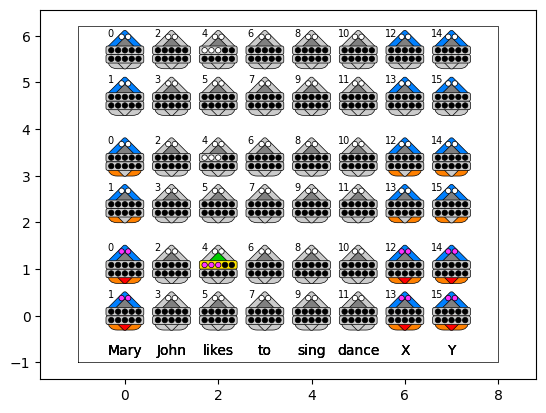

In [200]:
from carabao.screen import Monitor
from carabao.util import repr

mon = Monitor(1+2.6*K.shape[0],K.shape[1])
lay = Layer(mon,G,K,P,xlabel=xlabel)
cells = lay.cells

c = [0,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0]

seq = 0  # sequence number
lay.connect(seq,minicol['likes'],token['Mary'])
c = lay.process(token['Mary'],c,verbose=True)
mon.log(cells[1,2],"cell[1,2]",True)


connect => K[0,3]: #[4 12 14 3 4; 5 6 7 8 9]
connect => P[0,3]: #[1 1 1 0 0; 0 0 0 0 0]
u: [0, 0, 1, 0, 0, 0, 1, 1]
c: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


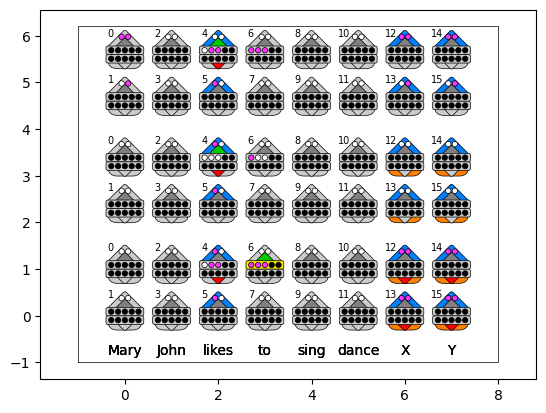

In [201]:
mon = Monitor(1+2.6*K.shape[0],K.shape[1])
lay.connect(seq,minicol['to'],token['likes'])
c = lay.process(token['likes'],c,verbose=True)


connect => K[0,4]: #[6 12 14 3 4; 5 6 7 8 9]
connect => P[0,4]: #[1 1 1 0 0; 0 0 0 0 0]
u: [0, 0, 0, 1, 0, 0, 1, 1]
c: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


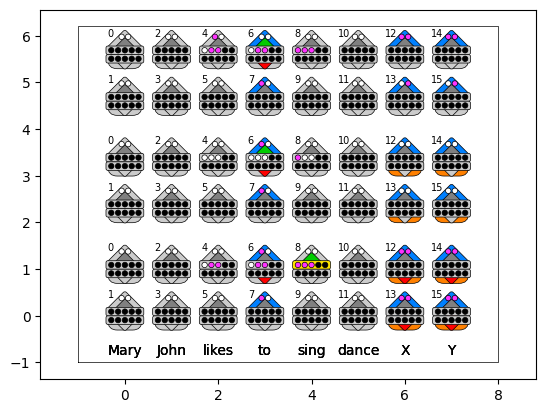

In [202]:
mon = Monitor(1+2.6*K.shape[0],K.shape[1])
lay.connect(seq,minicol['sing'],token['to'])
c = lay.process(token['to'],c,verbose=True)


u: [0, 0, 0, 0, 1, 0, 1, 1]
c: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]


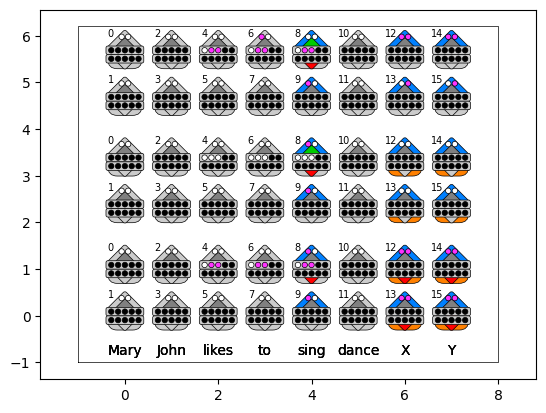

In [203]:
mon = Monitor(1+2.6*K.shape[0],K.shape[1])
c = lay.process(token['sing'],c,verbose=True)


connect => K[1,2]: #[3 13 15 3 4; 5 6 7 8 9]
connect => P[1,2]: #[1 1 1 0 0; 0 0 0 0 0]
u: [0, 1, 0, 0, 0, 0, 1, 1]
c: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]


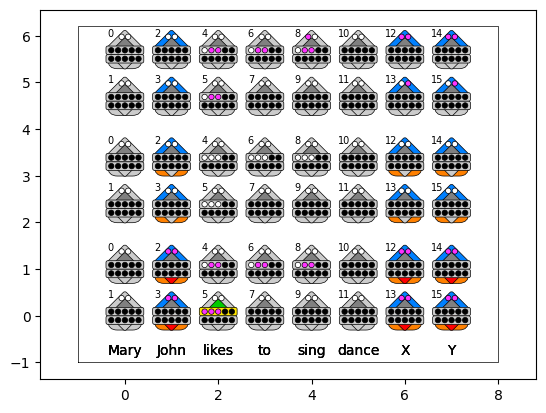

In [204]:
mon = Monitor(1+2.6*K.shape[0],K.shape[1])

seq += 1  # next sequence
lay.connect(seq,minicol['likes'],token['John'])
c = lay.process(token['John'],c,verbose=True)


connect => K[1,3]: #[5 13 15 3 4; 5 6 7 8 9]
connect => P[1,3]: #[1 1 1 0 0; 0 0 0 0 0]
u: [0, 0, 1, 0, 0, 0, 1, 1]
c: [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


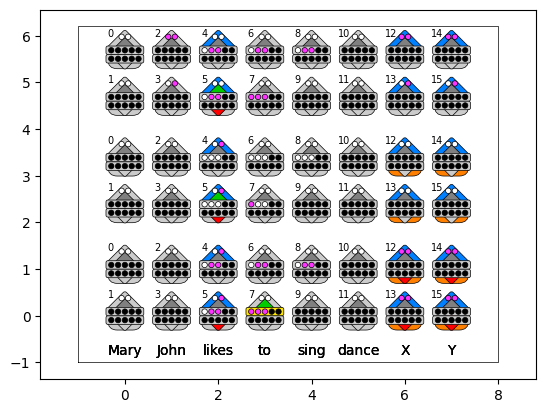

In [205]:
mon = Monitor(1+2.6*K.shape[0],K.shape[1])
lay.connect(seq,minicol['to'],token['likes'])
c = lay.process(token['likes'],c,verbose=True)


connect => K[1,5]: #[7 13 15 3 4; 5 6 7 8 9]
connect => P[1,5]: #[1 1 1 0 0; 0 0 0 0 0]
u: [0, 0, 0, 1, 0, 0, 1, 1]
c: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


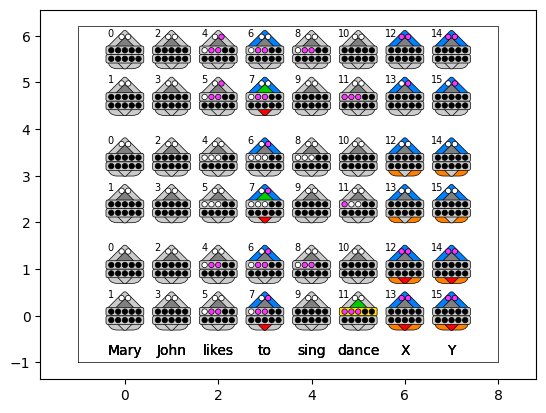

In [206]:
mon = Monitor(1+2.6*K.shape[0],K.shape[1])
lay.connect(seq,minicol['dance'],token['to'])
c = lay.process(token['to'],c,verbose=True)


u: [0, 0, 0, 0, 0, 1, 1, 1]
c: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]


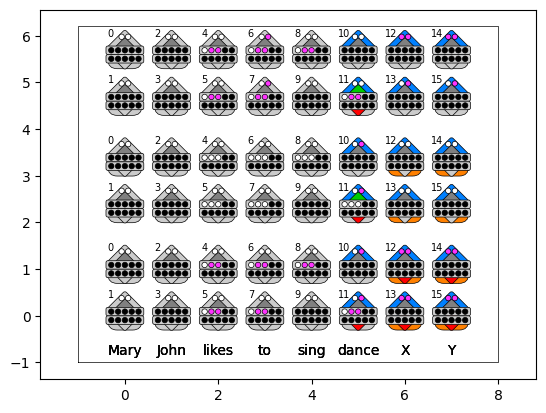

In [207]:
mon = Monitor(1+2.6*K.shape[0],K.shape[1])
c = lay.process(token['dance'],c,verbose=True)
